In [4]:
import os
import math
import itertools

import numpy as np
import matplotlib.pyplot as plt

In [10]:
for entry in itertools.product(list(range(-2, 3)), list(range(-2, 3))):
    print(entry)

(-2, -2)
(-2, -1)
(-2, 0)
(-2, 1)
(-2, 2)
(-1, -2)
(-1, -1)
(-1, 0)
(-1, 1)
(-1, 2)
(0, -2)
(0, -1)
(0, 0)
(0, 1)
(0, 2)
(1, -2)
(1, -1)
(1, 0)
(1, 1)
(1, 2)
(2, -2)
(2, -1)
(2, 0)
(2, 1)
(2, 2)


In [11]:
boundaries = [(-2,2), (-1,2), (0,2), (1,2), (2,2), 
             (-2,1), (2,1), (-2,0), (2,0), (-2,-1), (2, -1),
             (-2,-2), (-1,-2), (0,-2), (1,-2), (2,-2)]

In [44]:
complex_boundaries = [(-2,2), (0,2), (1,2), (2,2), 
             (-2,1), (2,1), (-2,0), (2,0), (-2,-1), (2, -1),
             (-2,-2), (-1,-2), (0,-2), (1,-2), (2,-2), (-2, 3), (-1, 3), (0, 3)]

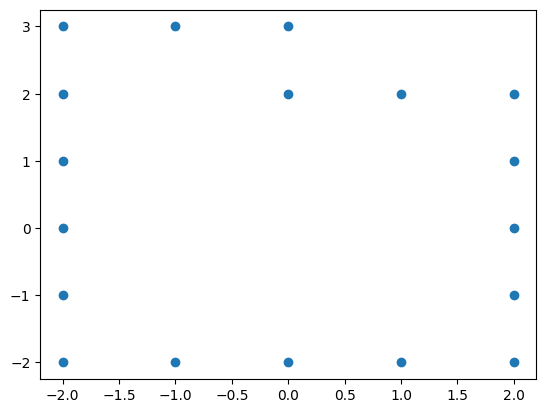

In [45]:
plt.scatter(*zip(*complex_boundaries))

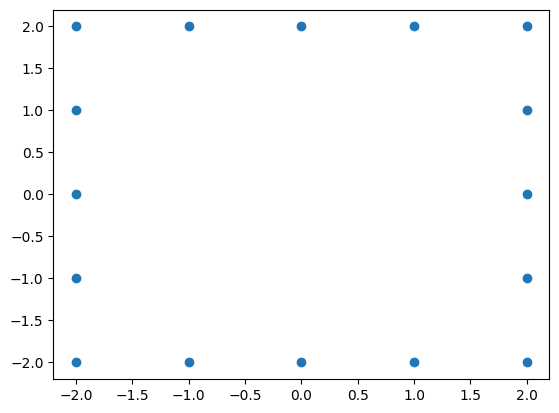

In [14]:
plt.scatter(*zip(*boundaries))

In [39]:
def calculate_nodes(boundary):
    nodes = []
    
    x_list = [x for x,y in boundary]
    y_list = [y for x,y in boundary]
    
    min_y, max_y = min(y_list), max(y_list)
    
    for y in range(min_y+1, max_y):
        indices = [i for i,y_temp in enumerate(y_list) if y_temp == y]
        x_vals = [x_list[i] for i in indices]
        
        min_x, max_x = min(x_vals), max(x_vals)
        
        inside = False
        for x in range(min_x, max_x + 1):
            if ((x,y) in boundary) & ((x-1, y) in boundary):
                continue
            elif (x,y) in boundary:
                inside = not inside
                continue
            elif inside:
                nodes.append((x,y))
                
    return nodes

In [84]:
nodes = calculate_nodes(boundaries)

In [85]:
nodes

[(-1, -1), (0, -1), (1, -1), (-1, 0), (0, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]

In [86]:
nodes.index((-1,-1))

0

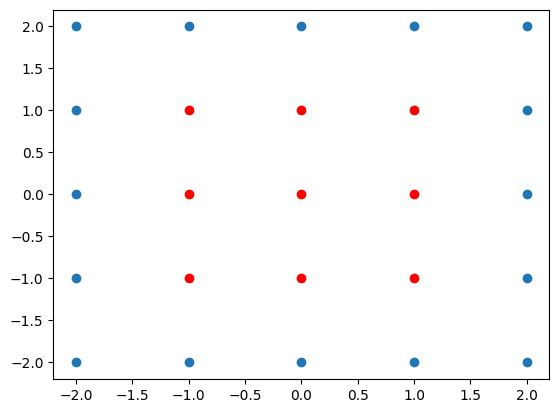

In [88]:
plt.scatter(*zip(*boundaries))
plt.scatter(*zip(*nodes), c="r")

In [89]:
a = np.zeros(6)

In [90]:
a[3] = 1

In [91]:
a

array([0., 0., 0., 1., 0., 0.])

In [23]:
def calculate_transition_matrix(nodes, boundaries):
    rows = []
    
    for x,y in nodes:
        row = np.zeros(len(nodes))
        if (x+1, y) not in boundaries:
            index = nodes.index((x+1, y))
            row[index] = 0.25
        if (x-1, y) not in boundaries:
            index = nodes.index((x-1, y))
            row[index] = 0.25
        if (x, y+1) not in boundaries:
            index = nodes.index((x, y+1))
            row[index] = 0.25
        if (x, y-1) not in boundaries:
            index = nodes.index((x, y-1))
            row[index] = 0.25
        rows.append(row)
        
    return np.vstack(rows)

In [94]:
transition = calculate_transition_matrix(nodes, boundaries)

In [95]:
transition

array([[0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  ]])

In [96]:
nodes

[(-1, -1), (0, -1), (1, -1), (-1, 0), (0, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]

In [97]:
N = np.identity(transition.shape[0]) - transition

In [98]:
N = np.linalg.inv(N)

In [99]:
sum(N[nodes.index((0,0))])

4.5

# Given the boundary function

In [19]:
def calculate_nodes_and_boundaries(function_params):
    """
    function_params = [a, b, c, d, e]
    """
    a, b, c, d, e = function_params
    
    x_max = a + (b * np.sqrt(e))
    x_min = a + (b * -np.sqrt(e))
    x_max, x_min = int(np.ceil(x_max)), int(np.floor(x_min))
    
    y_max = c + (d * np.sqrt(e))
    y_min = c + (d * -np.sqrt(e))
    y_max, y_min = int(np.ceil(y_max)), int(np.floor(y_min))
    
    nodes = []
    for y in range(y_min, y_max+1):
        for x in range(x_min, x_max):
            if ((x-a)/b)**2 + ((y-c)/d)**2 < e:
                nodes.append((x,y))
    
    boundaries = []
    for (x,y) in nodes:
        if ((x+1,y) not in nodes) & ((x+1,y) not in boundaries):
            boundaries.append((x+1,y))
        if ((x-1,y) not in nodes) & ((x-1,y) not in boundaries):
            boundaries.append((x-1,y))
        if ((x,y+1) not in nodes) & ((x,y+1) not in boundaries):
            boundaries.append((x,y+1))
        if ((x,y-1) not in nodes) & ((x,y-1) not in boundaries):
            boundaries.append((x,y-1))
    
    return nodes, boundaries

In [20]:
nodes, boundaries = calculate_nodes_and_boundaries([0.25, 3, 0.25, 4, 1])

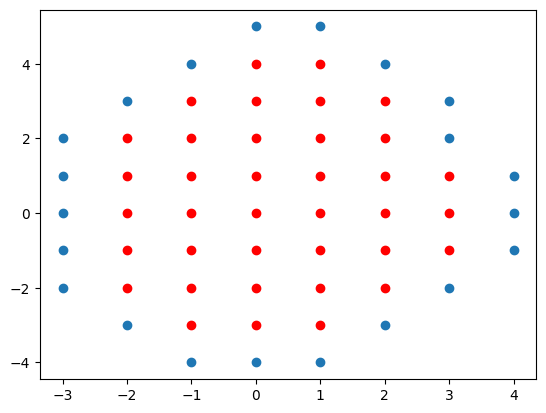

In [21]:
plt.scatter(*zip(*boundaries))
plt.scatter(*zip(*nodes), c="r")

In [24]:
transition = calculate_transition_matrix(nodes, boundaries)
N = np.identity(transition.shape[0]) - transition
N = np.linalg.inv(N)

In [25]:
sum(N[nodes.index((0,0))])

13.992053058411818